# **AeroPython**

#### Libraries

In [276]:
from functools import reduce
import numpy as np
import sympy
from sympy import init_printing
from sympy.utilities.lambdify import lambdify
import time, sys
from matplotlib import pyplot as plt
from matplotlib import rc, cm
from sympy import init_printing
import math
from mpl_toolkits.mplot3d import Axes3D
import timeit
from jupyterthemes import jtplot
jtplot.style(grid=False)
# jtplot.reset()
init_printing(use_latex=True)
rc('font',**{'family':'serif'})
rc('text', usetex=True)

## Definitions

The **circulation** $\Gamma$ of a vector field $\vec f(x^i)$ about a closed contour $C$ parametrised by a vector $d \vec l$:

$$ \Gamma \equiv \oint_C \vec f(x^i) \cdot d\vec l $$

Note that the dimension of the vector space is irrelevant.

This is related to **Stokes' theorem**, which indicates the 'total' curl of the vector field for an open surface $\partial S$:

$$ \oint_C \vec f \cdot d\vec l = \iint_{\partial S} \left(\nabla \times \vec f\right)\cdot \vec n\ dS $$

The **vorticity** $\omega$ is defined as the curl of the velocity field $\vec V$, specifically: $ \omega \equiv \nabla \times \vec V $

Similarly, the total 'emittance' of $\vec f$ over a closed surface $S$ is related to the 'total' divergence of a vector field from a volume $V$ via **Gauss' theorem**:

$$ \iint_S \vec f \cdot d\vec S = \iiint_V \nabla \cdot \vec f \ dV $$

#### Fluid Mechanics

The differential form of the **incompressible Navier-Stokes equations** in an external gravitational field $\vec g$ with non-conservative body forces $\vec f$ is:
    
$$ \nabla \cdot \vec V = 0 $$

$$ \rho \left[\frac{\partial \vec V}{\partial t} + \vec V \cdot \nabla \vec V  \right] = -\nabla p + \rho \vec g + \nabla \cdot \hat \tau + \vec f$$

The energy equation reduces to Bernoulli's equation (mentioned later), which can be derived from the momentum equation above, hence it need not be considered.

If the flow is steady and inviscid, the time derivatives and the stress terms drop out, giving the **Euler equations**:

$$ \nabla \cdot \vec V = 0 $$

$$ \vec V \cdot \nabla \vec V= -\frac{\nabla p}{\rho} + \vec g + \frac{\vec f}{\rho}$$

Assume we're in space with no gravitation, external body forces or pressures, then only the continuity equation needs to be solved. Also assume the flow is irrotational, i.e. $\nabla \times \vec V = 0$ because the assumptions aren't enough. Using Stokes' theorem, the $\Gamma = 0$. This describes a _conservative_ vector field, which can be expressed in the form of a scalar potential $\vec V = \nabla \phi$, giving **Laplace's equation**:

$$ \nabla^2 \phi = 0 $$

Since the real and imaginary parts of an analytic function of a complex variable $z$ independently satisfy Laplace's equation, another Laplace equation can be constructed by considering $\phi$ as the real part and using the Cauchy-Riemann conditions in Cartesian coordinates:

$$ \vec V = (u(x,y), v(x,y)), \quad u = \frac{\partial \phi}{\partial x} = \frac{\partial \psi}{\partial y},\quad v = \frac{\partial \phi}{\partial y} = -\frac{\partial \psi}{\partial x} $$

where $\psi$ is called a **stream function**. This leads to the construction of a **complex potential** $\Psi = \phi + i \psi $. The stream function can also be constructed by the following definition of a **streamline**:

$$ \frac{dy}{dx} = \frac{v(x,y)}{u(x,y)} \iff u\ dy - v\ dx = 0$$

The second expression is an exact differential $d\psi =0$ if and only if the previous conditions for $\psi$ are satisfied. Note that the contours generated by $\phi$ and $\psi$ are orthogonal.

For a steady, inviscid, incompressible flow along a streamline, **Bernoulli's equation** is applicable for comparisons of pressure and velocity at two points:

$$ p_{1} + \frac{1}{2}\rho V_1^2 = p_2 + \frac{1}{2}\rho V_2^2 $$

#### Aside: Mathematical Generality

Electromagnetics and fluid dynamics are usually about almost exclusively solving partial differential equations either analytically or numerically. The Laplace equation also governs the basic laws of electrostatics, which can be derived from Maxwell's equations. So let's look at some basic solutions first for the **Poisson equation** with a source $\rho$, a more general form of Laplace's equation first:

$$ \nabla^2 \phi(\vec x) = \rho(\vec x) $$

This can be solved via the method of Green functions:

\begin{align*}
\nabla^2 G(\vec x, \vec x_0) & = \delta(\vec x - \vec x_0) \\
\int_{-\infty}^{\infty} \left[\nabla^2 G(\vec x, \vec x_0)\right]  e^{i\vec k \cdot \vec x}\ d\vec x & = \int_{-\infty}^{\infty} \delta(\vec x - \vec x_0) e^{i\vec k \cdot \vec x}\ d\vec x \\
|\vec k|^2 G(\vec k, \vec x_0) & = e^{i \vec k \cdot \vec x_0} \\
\implies G(\vec x, \vec x_0) & = \frac{1}{2\pi}\int_{-\infty}^{\infty} \frac{e^{-i \vec k \cdot (\vec x -\vec x_0)}}{|\vec k|^2} \ d\vec k
\end{align*}

This is singular at $\vec k = \vec 0$, so the contour must be deformed in the complex plane.

#### Potential Flows

So a majority of basic (and unrealistic!) fluid flows can be generated by solving Laplace's equation for $\psi$ (the streamlines) using certain boundary conditions and declarations of $u, v$, which is somewhat of an inverse problem. Sometimes coordinate transformations would be required to integrate the PDEs more easily, but they might introduce scale factors. Note that these are 2D because of the definitions.

Laplace's equation is linear, so any superposition of different solutions will give you a new function describing a more general flow. A common point of analysis in potential flows is the **stagnation point**, at which $u(x,y) = v(x,y) = 0$.

Usually in aerodynamic flows, the **pressure coefficient** is an important quantity to measure local pressure $p$ at some point compared to the freestream pressure $p_{\infty}$, using Bernoulli's equation in an external flow with freestream speed $V_{\infty}$:

$$ C_p \equiv \frac{p - p_{\infty}}{\frac{1}{2}\rho V_{\infty}^2} = 1 - \left(\frac{V}{V_{\infty}}\right)^2 $$

## Source and Sink Flow

Consider a situation in which an ideal fluid is emanating/culminating from/to a point source in a perfect vacuum at a constant radial rate $\sigma$. This situation can somewhat naively be represented by the following conditions in polar coordinates with $r = \sqrt{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2},\ \theta = \tan^{-1} (y-y_\text{source}/x-x_\text{source})$:

$$ u_r = \frac{\sigma}{2\pi r}, \quad u_{\theta} = 0 $$

The solution for the velocity potential is:

$$ \frac{\partial\phi}{\partial r} = \frac{\sigma}{2\pi r}, \quad \frac{1}{r}\frac{\partial \phi}{\partial \theta} = 0 $$

$$ \implies \phi(r, \theta) = \frac{\sigma}{2\pi}\ln r + n, \quad n \in \mathbb R $$

The solution for the stream function is:

$$ \frac{1}{r}\frac{\partial\psi}{\partial \theta} = \frac{\sigma}{2\pi r}, \quad -\frac{\partial \psi}{\partial r} = 0 $$

$$ \implies \psi(r,\theta) = \frac{\sigma}{2\pi}\theta + k, \quad k \in \mathbb R$$

The constants $k, n$ are dependent on the boundary conditions, which we will set to $\psi(r, 0) = 0 \implies k = 0$, $\phi(1, \theta) = 0$. They're not very important since the quantities are differentiated anyway, so we will ignore these from now on. Note that even if they're non-zero, the functions can be redefined as $\psi - n,\ \phi - k$ with no change to the physics, so this is allowed.

In Cartesian coordinates, the velocity is expressed as:

$$u = \frac{\partial\psi}{\partial y} = \frac{\sigma}{2\pi}\frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

$$v = -\frac{\partial\psi}{\partial x} = \frac{\sigma}{2\pi}\frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2+\left(y-y_\text{source}\right)^2}$$

Now we will compute the streamlines and potential lines, and plot them.

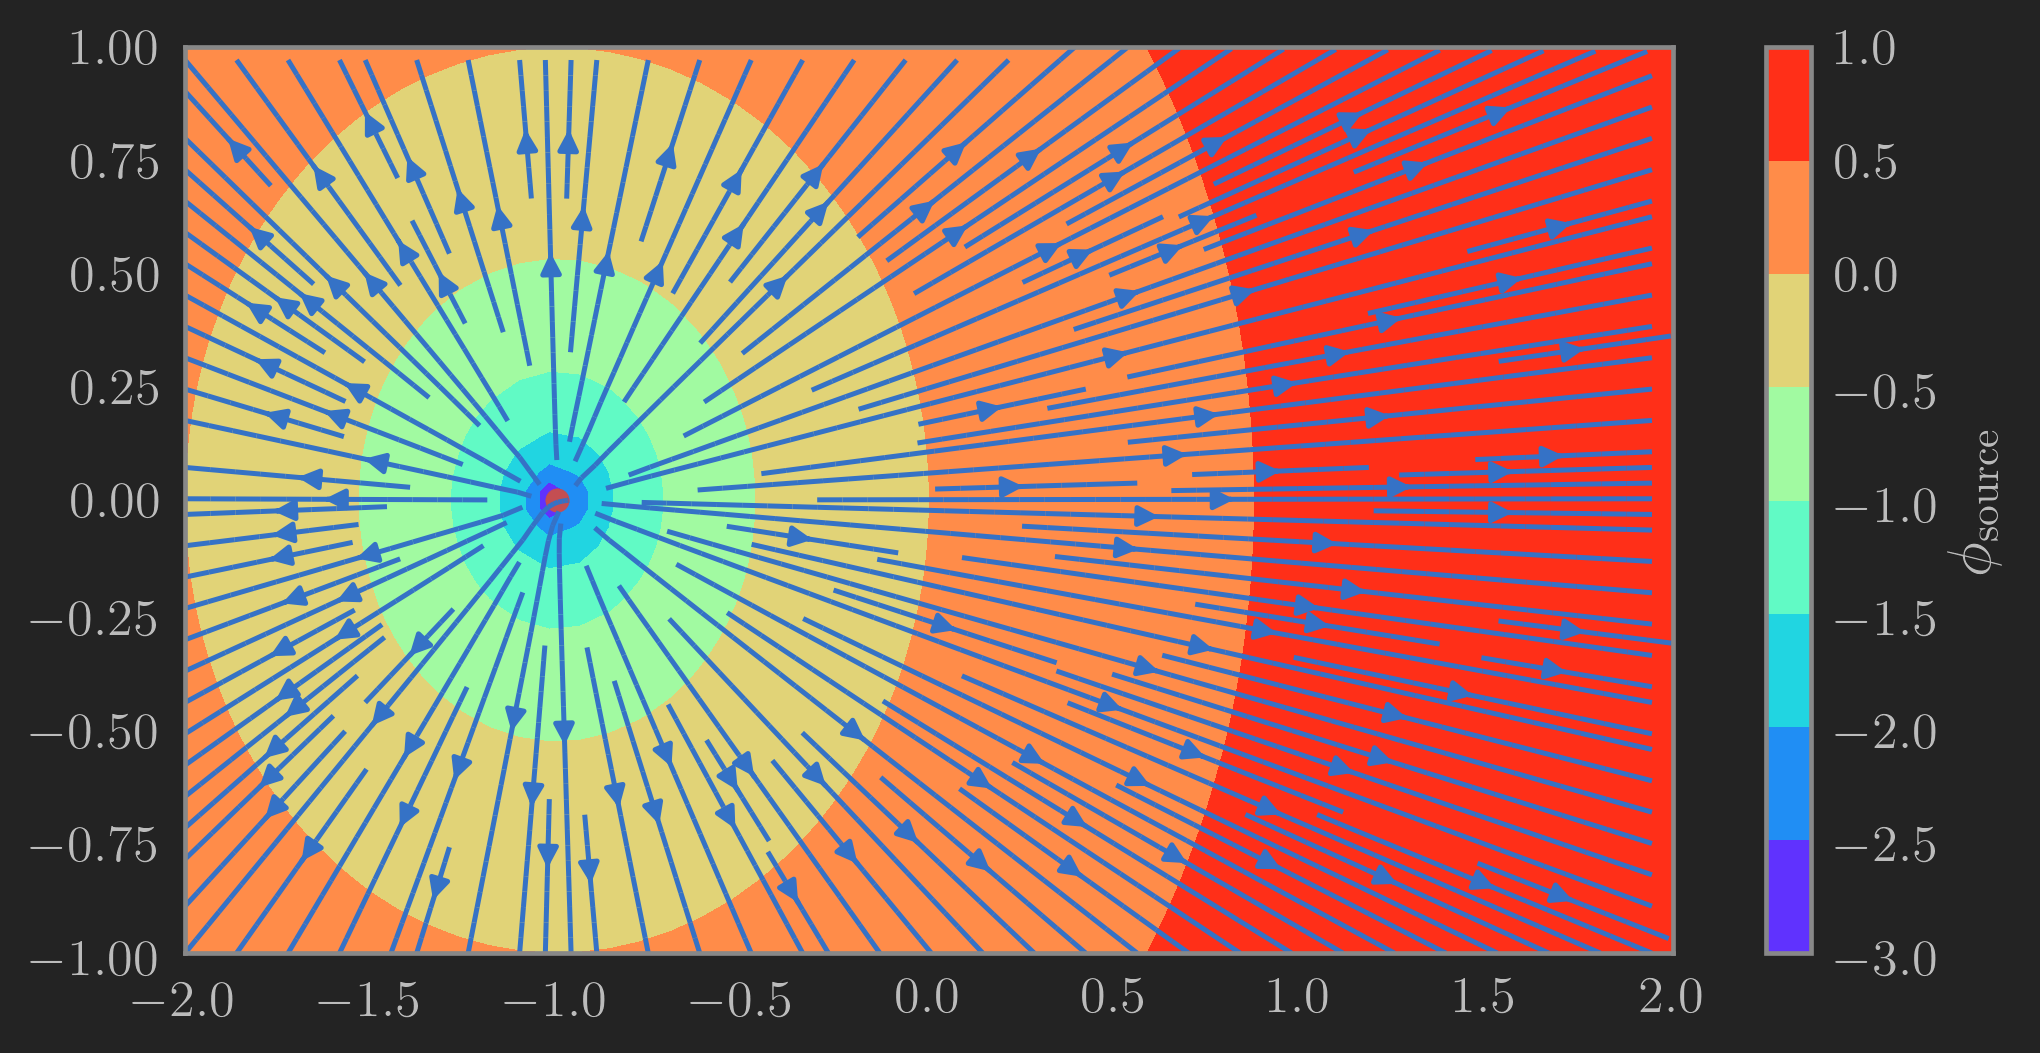

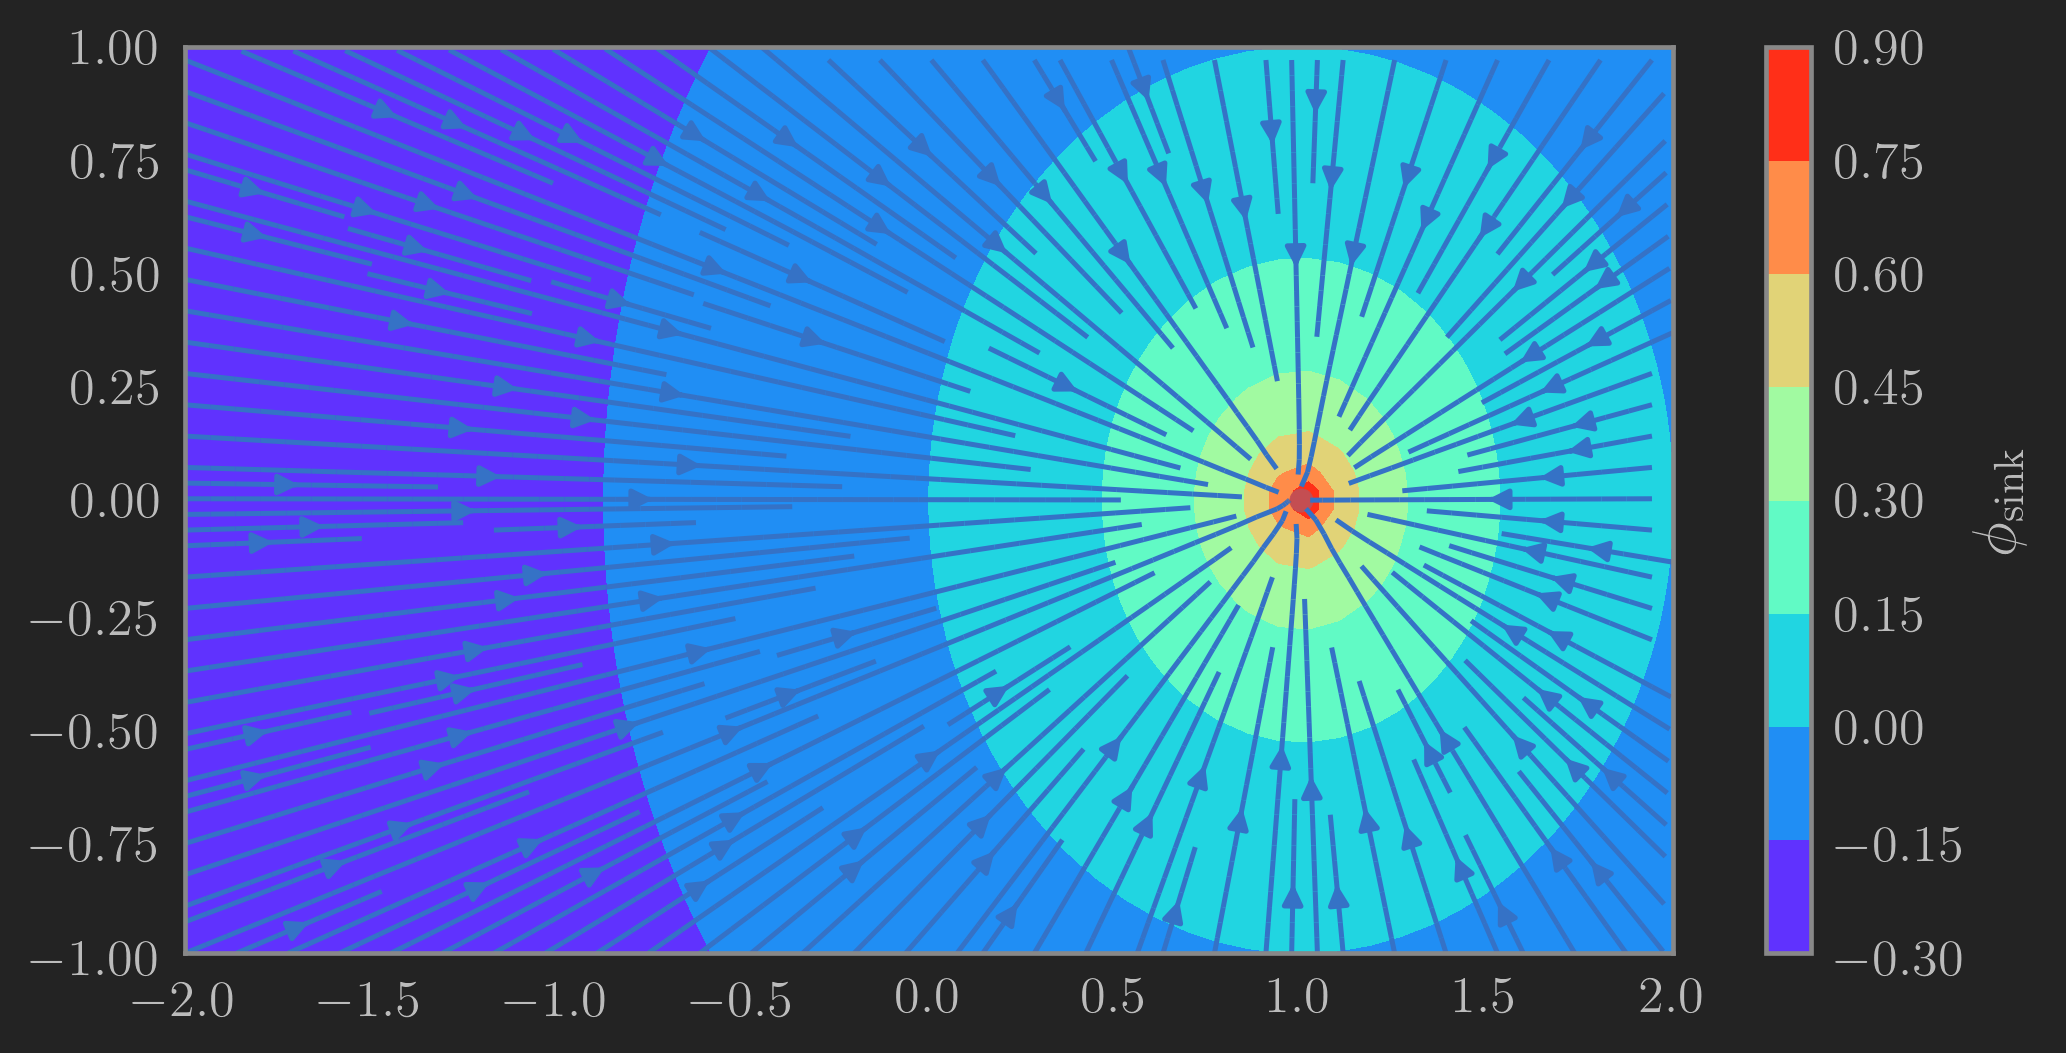

In [271]:
x_domain, y_domain = (-2, 2), (-1, 1)
source_strength = 5.0
sink_strength = -1.5
x_source, y_source = -1.0, 0.0
x_sink, y_sink = 1.0, 0.0
grid_size = 50
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

source = lambda strength, x, y, x_0, y_0: (strength/(2*np.pi)*(x - x_0)/((x - x_0)**2 + (y - y_0)**2), strength/(2*np.pi)*(y - y_0)/((x - x_0)**2 + (y - y_0)**2))

src = source(source_strength, X, Y, x_source, y_source)
snk = source(sink_strength, X, Y, x_sink, y_sink)

potential = lambda strength, x, y, x_0, y_0: strength/(2*np.pi)*np.log(np.sqrt((x - x_0)**2 + (y - y_0)**2))

src_pot = potential(source_strength, X, Y, x_source, y_source)
snk_pot = potential(sink_strength, X, Y, x_sink, y_sink)

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig1 = plt.figure(1, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, src[0], src[1], density=2)
plt.contourf(X, Y, src_pot, cmap=cm.rainbow)
plt.colorbar(label=r'$\phi_{\mathrm{source}}$')
pyplot.scatter(x_source, y_source,
               color='r', marker='o');
plt.xlim(x_domain)
plt.ylim(y_domain)

fig2 = plt.figure(2, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, snk[0], snk[1], density=2)
plt.contourf(X, Y, snk_pot, cmap=cm.rainbow)
plt.colorbar(label=r'$\phi_{\mathrm{sink}}$')
plt.scatter(x_sink, y_sink,
               color='r', marker='o');
plt.xlim(x_domain)
plt.ylim(y_domain);

This can be cleaned up and written into a class for repeated usage. Source-sink pair example:

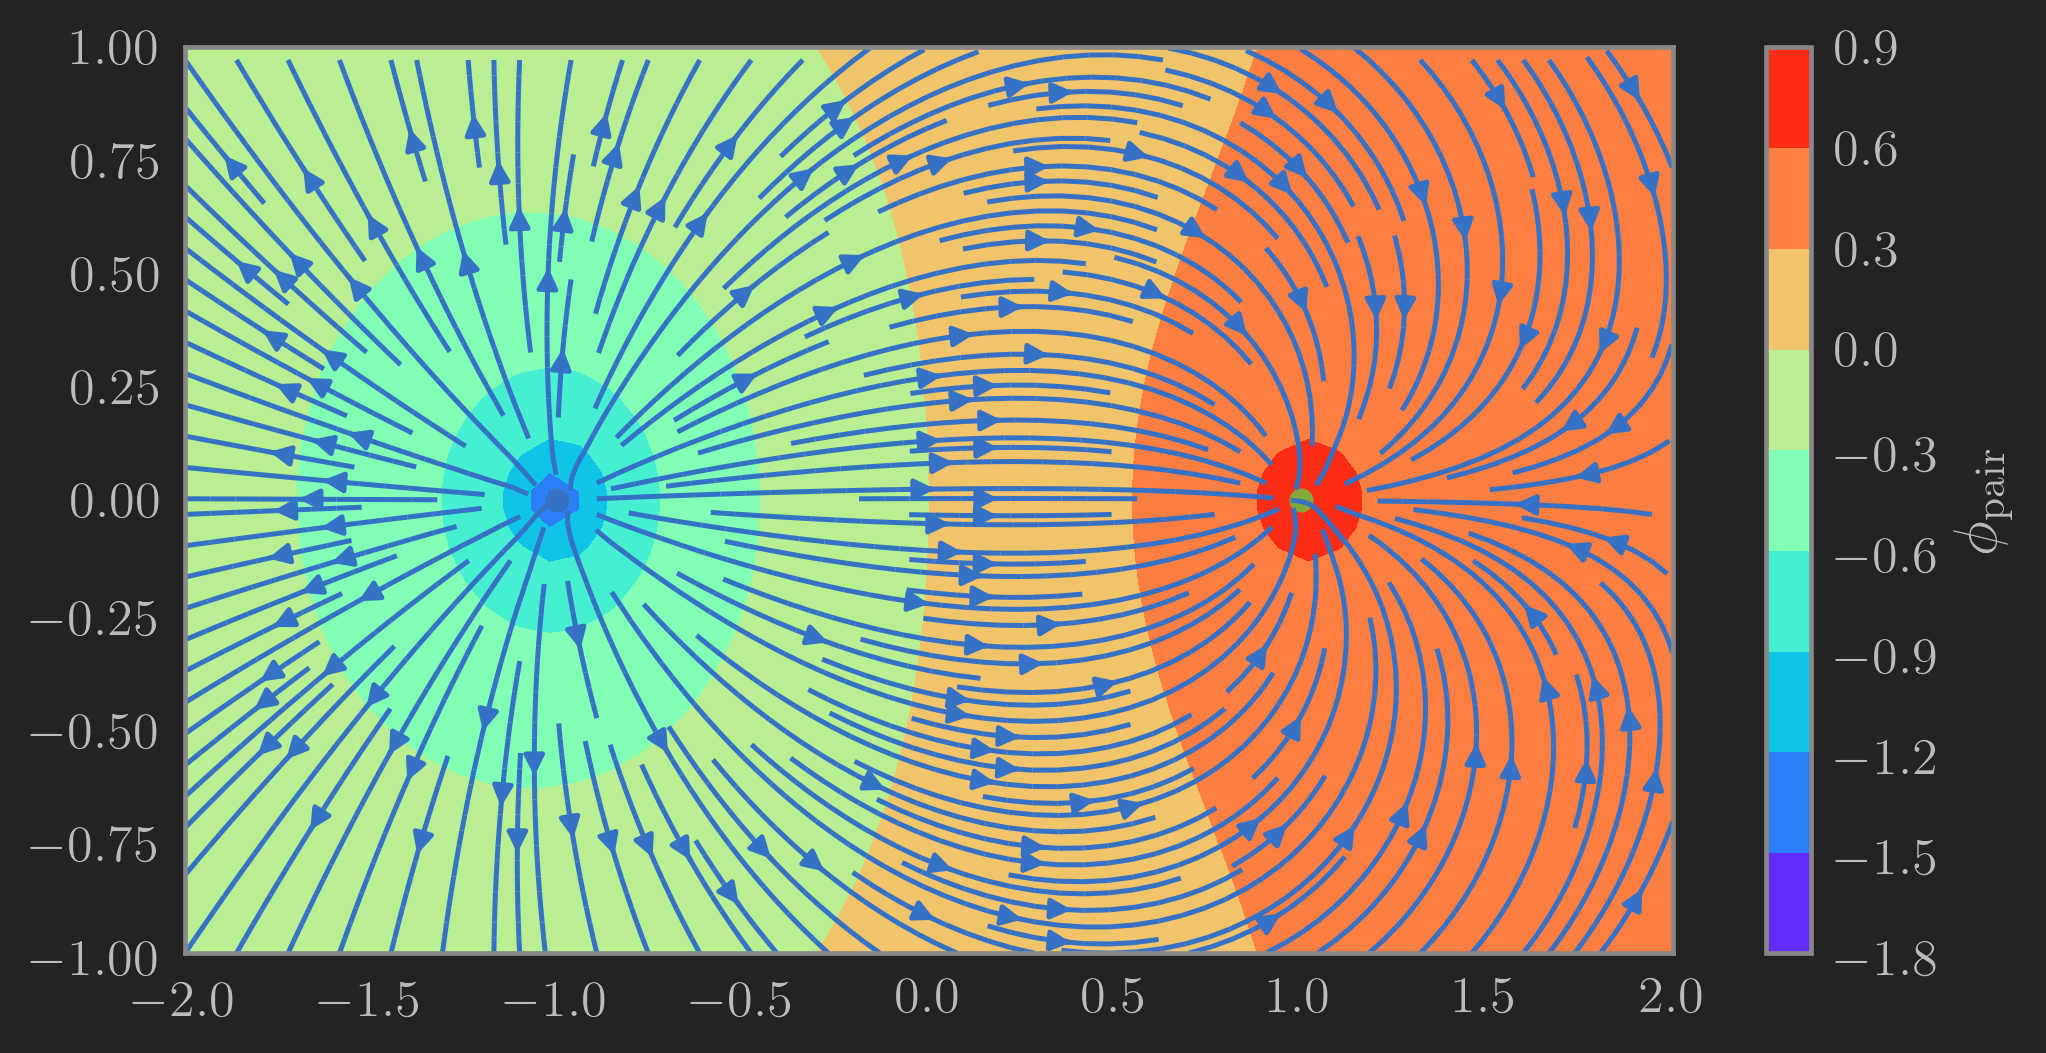

In [277]:
class Source:
    """
    Defines a source or sink.
    
    Parameters
    ---
    sigma: strength
    x_0: source x-location
    y_0: source y-location
    """
    import numpy as np
    
    def __init__(self, sigma, x_0, y_0):
        self.strength = sigma
        self.x_0 = x_0
        self.y_0 = y_0
        
    def velocity(self, x, y):
        u = self.strength/(2*np.pi)*(X - self.x_0)/((x - self.x_0)**2 + (y - self.y_0)**2)
        v = self.strength/(2*np.pi)*(y - self.y_0)/((x - self.x_0)**2 + (y - self.y_0)**2)
        
        return (u, v)
    
    def stream_func(self, x, y):
        psi = self.strength/(2*np.pi)*np.arctan2(y - self.y_0, x - self.x_0)
        
        return psi
        
    def potential(self, x, y):
        pot = self.strength/(4*np.pi)*np.log(np.sqrt((x - self.x_0)**2 + (y - self.y_0)**2))
        
        return pot

src1_strength = 5.0
src2_strength = -2.0
x1, y1 = -1.0, 0.0
x2, y2 = 1.0, 0.0
grid_size = 50
x_domain, y_domain = (-2, 2), (-1, 1)
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

src1 = Source(src1_strength, x1, y1)
src2 = Source(src2_strength, x2, y2)
pair = [ src1.velocity(X, Y)[i] + src2.velocity(X, Y)[i] for i in range(2) ]
pot = src1.potential(X, Y) + src2.potential(X, Y)
stream = src1.stream_func(X, Y) + src2.stream_func(X, Y)

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig4 = plt.figure(3, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, pair[0], pair[1], density=2)
plt.contourf(X, Y, pot, cmap=cm.rainbow)
plt.colorbar(label=r'$\phi_{\mathrm{pair}}$')
plt.scatter(x1, y1, marker='o')
plt.scatter(x2, y2, marker='o')
plt.xlim(x_domain)
plt.ylim(y_domain);

## Uniform Flow

A uniform flow is defined as a flow with a fixed magnitude $U_{\infty}$ and direction $\alpha$ (in degrees) everywhere in the domain. The velocity is expressed as follows in Cartesian coordinates:

$$ u = U_{\infty}\cos\alpha, \quad v = U_{\infty}\sin\alpha $$

The solution for the velocity potential is:

$$ \frac{\partial \phi}{\partial x} = U_{\infty}\cos\alpha, \quad \frac{\partial \phi}{\partial y} = U_{\infty}\sin\alpha $$ 

$$ \implies \phi(x,y) = U_{\infty}\left(x\cos\alpha + y\sin\alpha\right) $$

The solution for the stream function is:

$$ \frac{\partial \psi}{\partial y} = U_{\infty}\cos\alpha, \quad -\frac{\partial \psi}{\partial x} = U_{\infty}\sin\alpha $$ 

$$ \implies \psi(x,y) = U_{\infty}\left(y\cos\alpha - x\sin\alpha\right) $$

In [273]:
class Uniform:
    """
    Defines a uniform flow.
    
    Parameters:
    1. u_inf = magnitude
    2. alpha = angle
    """
    import numpy as np
    
    def __init__(self, u_inf, alpha):
        self.U = u_inf
        self.angle = alpha
        
    def velocity(self, x, y):
        u = self.U*(np.cos(np.deg2rad(self.angle)))
        v = self.U*(np.sin(np.deg2rad(self.angle)))
        
        return (u, v)
    
    def stream_func(self, x, y):
        psi = self.U*(y*np.cos(np.deg2rad(self.angle)) - x*np.sin(np.deg2rad(self.angle)))
        
        return psi
        
    def potential(self, x, y):
        pot = self.U*(x*np.cos(np.deg2rad(self.angle)) + y*np.sin(np.deg2rad(self.angle)))
        
        return pot

#### Uniform with Source Flow

Velocity potential: 
    
$$ \phi(x,y) = U_{\infty}(x\cos\alpha + y\sin\alpha) + \frac{\sigma}{4\pi}\ln \left[(x - x_{\mathrm{source}})^2 + (y - y_{\mathrm{source}})^2\right] $$

Stream function:

$$\psi(x,y) = U_\infty (y\cos\alpha - x\sin\alpha) + \frac{\sigma}{2\pi} \tan^{-1} \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right) $$

The stagnation point can be computed for this, which gives you simultaneous quadratic equations. Luckily fourth-order polynomials are exactly solvable.

Stagnation point location:

$$ U_{\infty}\cos\alpha + \frac{\sigma}{2\pi}\frac{x_{\mathrm{stag}}- x_\text{source}}{\left(x_{\mathrm{stag}}- x_\text{source}\right)^2+\left(y_{\mathrm{stag}}-y_\text{source}\right)^2} = 0 $$

$$ U_{\infty}\sin\alpha + \frac{\sigma}{2\pi}\frac{y_{\mathrm{stag}}- y_\text{source}}{\left(x_{\mathrm{stag}}- x_\text{source}\right)^2+\left(y_{\mathrm{stag}}-y_\text{source}\right)^2}= 0 $$

$$ \implies x_{\mathrm{stag}} - x_{\mathrm{source}} = \left[-\frac{\sigma}{2\pi\cos\alpha} - (y_{\mathrm{stag}} - y_{\mathrm{source}})^2\right]^2 $$

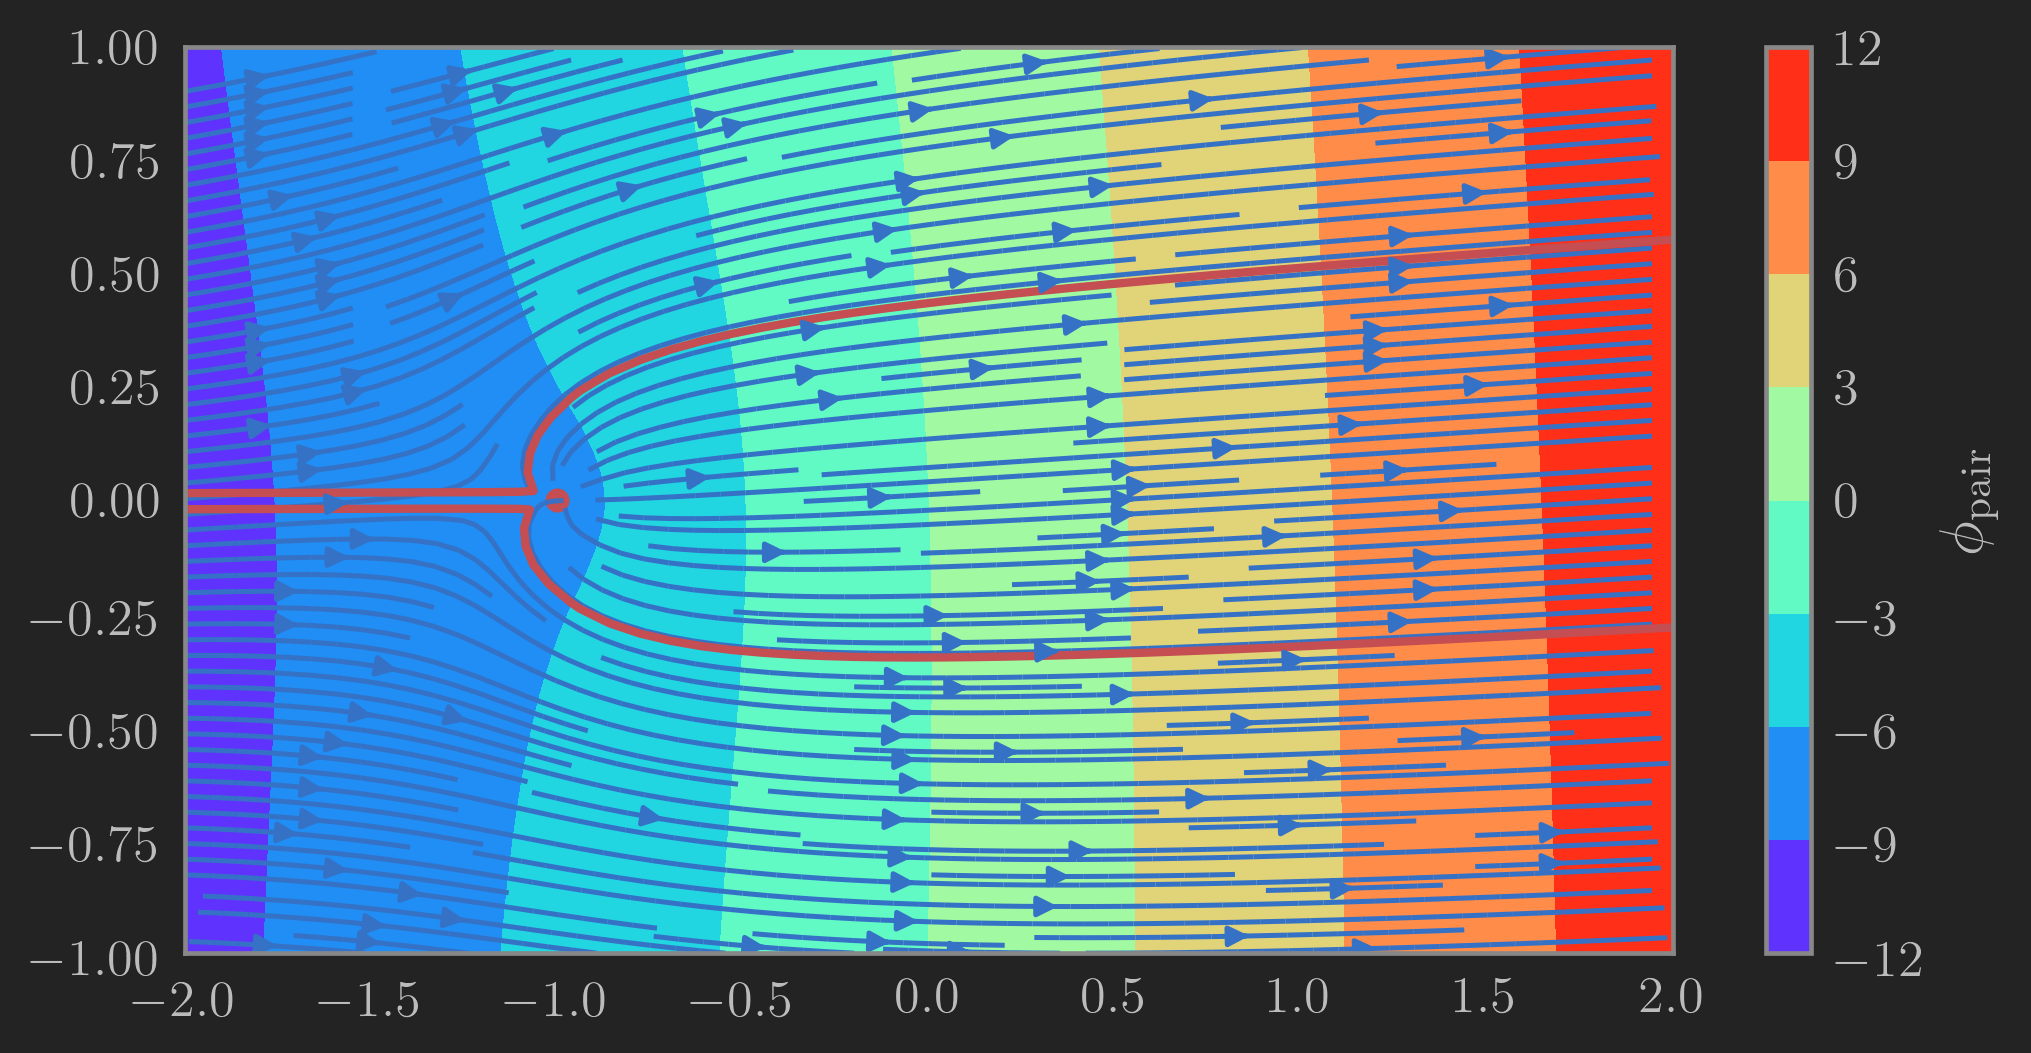

In [274]:
uniform_mag = 5.0
uniform_ang = 3.0
src1_strength = 5.0
x1, y1 = -1.0, 0.0
grid_size = 50
x_domain, y_domain = (-2, 2), (-1, 1)
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

uniform = Uniform(uniform_mag, uniform_ang)
src1 = Source(src1_strength, x1, y1)
pair = [ src1.velocity(X, Y)[i] + uniform.velocity(X, Y)[i] for i in range(2) ]
pot = src1.potential(X, Y) + uniform.potential(X, Y)
stream = src1.stream_func(X, Y) + uniform.stream_func(X, Y)

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig5= plt.figure(3, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, pair[0], pair[1], density=2)
plt.contourf(X, Y, pot, cmap=cm.rainbow)
plt.colorbar(label=r'$\phi_{\mathrm{pair}}$')
plt.scatter(x1, y1, color='r', marker='o')
plt.contour(X, Y, stream,
               levels=[-src1_strength / 2. + 0.5, src1_strength / 2.], 
               colors='r', linewidths=2, linestyles='solid');
plt.xlim(x_domain)
plt.ylim(y_domain);

#### Rankine Oval

A **Rankine Oval** is a special case of uniform flow superposed with source and sink flow, in which the strengths of the source and sink are the same, and the freestream is collinear with the line connecting them. This is important for some reason, and the pressure coefficient will be computed.

Velocity potential:

$$ \phi(x,y) = U_{\infty}(x\cos\alpha + y\sin\alpha) + \frac{\sigma}{4\pi}\ln \left[\frac{(x - x_{\mathrm{source}})^2 + (y - y_{\mathrm{source}})^2}{(x - x_{\mathrm{sink}})^2 + (y - y_{\mathrm{sink}})^2}\right], \qquad \alpha = \tan^{-1}\left(\frac{y_{\mathrm{source}} - y_{\mathrm{sink}}}{x_{\mathrm{source}} - x_{\mathrm{sink}}}\right) $$

Stream function:

$$\psi(x,y) = U_\infty (y\cos\alpha - x\sin\alpha) + \frac{\sigma}{2\pi} \left[\tan^{-1} \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right) - \tan^{-1} \left(\frac{y-y_\text{sink}}{x-x_\text{sink}}\right)\right], \qquad \alpha = \tan^{-1}\left(\frac{y_{\mathrm{source}} - y_{\mathrm{sink}}}{x_{\mathrm{source}} - x_{\mathrm{sink}}}\right) $$

Stagnation points:

$$ U_{\infty}\cos\alpha + \frac{\sigma}{2\pi}\left[\frac{x_{\mathrm{stag}}- x_\text{source}}{\left(x_{\mathrm{stag}}- x_\text{source}\right)^2+\left(y_{\mathrm{stag}}-y_\text{source}\right)^2} - \frac{x_{\mathrm{stag}}- x_\text{sink}}{\left(x_{\mathrm{stag}}- x_\text{sink}\right)^2+\left(y_{\mathrm{stag}}-y_\text{sink}\right)^2} \right] = 0 $$

$$ U_{\infty}\sin\alpha + \frac{\sigma}{2\pi}\left[\frac{y_{\mathrm{stag}}- y_\text{source}}{\left(x_{\mathrm{stag}}- x_\text{source}\right)^2+\left(y_{\mathrm{stag}}-y_\text{source}\right)^2} - \frac{y_{\mathrm{stag}}- y_\text{sink}}{\left(x_{\mathrm{stag}}- x_\text{sink}\right)^2+\left(y_{\mathrm{stag}}-y_\text{sink}\right)^2} \right] = 0 $$

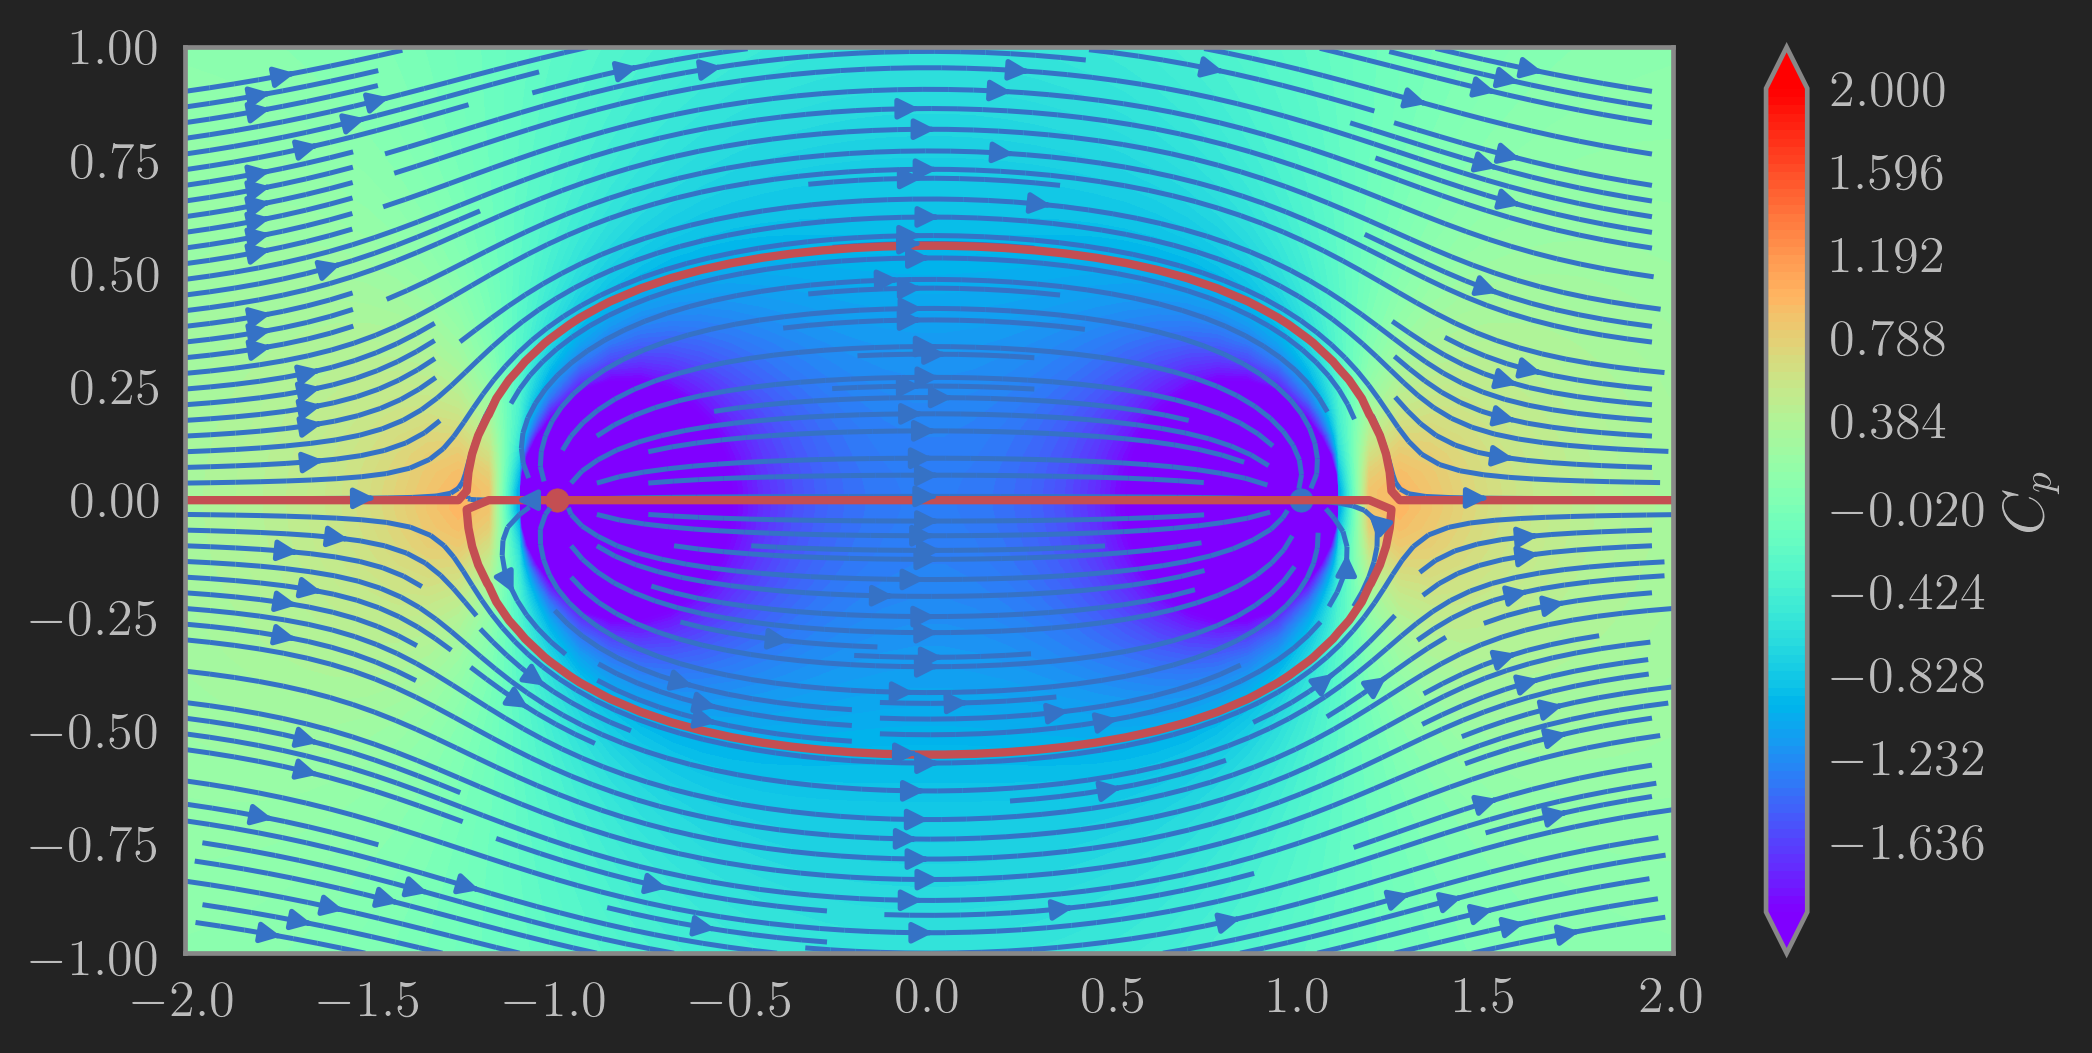

In [275]:
def pressure_coefficient(u, v, u_inf):
    "Computes the pressure coefficient."
    cp = 1. - (u**2 + v**2)/u_inf**2
    return cp

uniform_mag = 3.0
uniform_ang = 0.0
src1_strength = 5.0
src2_strength = -5.0
x1, y1 = -1.0, 0.0
x2, y2 = 1.0, 0.0
grid_size = 50
x_domain, y_domain = (-2, 2), (-1, 1)
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

uniform = Uniform(uniform_mag, uniform_ang)
src2 = Source(src2_strength, x2, y2)
pair = [ src1.velocity(X, Y)[i] + src2.velocity(X, Y)[i] + uniform.velocity(X, Y)[i] for i in range(2) ]
pot = src1.potential(X, Y) + src2.potential(X, Y)+ uniform.potential(X, Y)
stream = src1.stream_func(X, Y) + src2.stream_func(X, Y) + uniform.stream_func(X, Y)
cp = pressure_coefficient(pair[0], pair[1], uniform_mag)

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig6 = plt.figure(3, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, pair[0], pair[1], density=2)
plt.contourf(X, Y, cp, levels=numpy.linspace(x_domain[0], x_domain[1], 100), extend='both', cmap=cm.rainbow)
plt.colorbar(label=r'$C_p$')
CS1 = plt.contour(X, Y, stream,
               levels=[0.], 
               colors='r', linewidths=2, linestyles='solid')
plt.scatter(x1, y1, color='r', marker='o')
plt.scatter(x2, y2, color='b', marker='o')
plt.xlim(x_domain)
plt.ylim(y_domain);

## Doublet Flow

When you look at a source-sink pair from very far away with strengths proportionally increasing with distance relative to evaluation points, you obtain a contrived approximation called a **doublet**.

![svg](Images/Doublet.svg)

Velocity potential:

$$ \phi(x,y) = \lim_{l \to 0} \frac{\sigma}{4\pi}\ln \left[\frac{(x + l/2)^2 + y^2}{(x - l/2)^2 + y^2}\right] = ???$$

Stream function:

$$\psi(r,\theta) = -\frac{\sigma}{2\pi}\left(\theta_1 - \theta_2\right) \equiv -\frac{\sigma}{2\pi}\Delta\theta $$

From the above figure, $P(x,y)$ is some point very far away from the sources and sinks, i.e. $b, r \gg l$, so $\sin\Delta\theta \approx \Delta\theta$, which gives:

$$\psi(r,\theta) = \lim_{l \to 0} \frac{\sigma}{2\pi}\frac{a}{b} \approx \lim_{l \to 0} \frac{\sigma}{2\pi}\frac{l\sin\theta}{r - l\cos\theta},\quad \because \theta_1 \approx \theta_2 = \theta,\ b \approx r - l\cos\theta_1$$

Now $\sigma l$ is defined to be constant, so it can be combined into one _doublet strength_ $\kappa$. Evaluating the limit gives the final form:

$$ \psi(r,\theta) = -\frac{\kappa}{2\pi}\frac{\sin\theta}{r} $$

$$ \psi(x,y) = -\frac{\kappa}{2\pi}\frac{y}{x^2 + y^2} $$

The position of the doublet can be translated by the transformation $(x,y) \to (x - x_{\mathrm{position}}, y - y_{\mathrm{position}})$.

In [ ]:
class Doublet:
    """
    Defines a doublet.
    
    Parameters
    ---
    kappa: strength
    x_0: doublet x-location
    y_0: doublet y-location
    """
    import numpy as np
    
    def __init__(self, kappa, x_0, y_0):
        self.strength = kappa
        self.x_0 = x_0
        self.y_0 = y_0
        
    def velocity(self, x, y):
        u = -self.strength/(2*np.pi)*((x - self.x_0)**2 - (y - self.y_0)**2)/((x - self.x_0)**2 + (y - self.y_0)**2)**2
        v = -self.strength/(2*np.pi)*2*(x - self.x_0)*(y - self.y_0)/((x - self.x_0)**2 + (y - self.y_0)**2)**2
        
        return (u, v)
    
    def stream_func(self, x, y):
        psi = -self.strength/(2*np.pi)*(y - self.y_0)/((x - self.x_0)**2 + (y - self.y_0)**2)
        
        return psi
        
    def potential(self, x, y):
        # CHECK THIS YOU RETARD
        pot = self.strength/(2*np.pi)*np.log(np.sqrt((x - self.x_0)**2 + (y - self.y_0)**2))
        
        return pot

#### Doublet with Uniform Flow

Stagnation points with uniform flow:

$$ U_{\infty}\cos\theta - \frac{\kappa}{2\pi}\frac{(x - x_{\mathrm{position}})^2 - (y - y_{\mathrm{position}})^2}{\left[(x - x_{\mathrm{position}})^2 + (y - y_{\mathrm{position}})^2\right]^2} = 0$$

$$ U_{\infty}\sin\theta - \frac{\kappa}{2\pi}\frac{2(x - x_{\mathrm{position}})(y - y_{\mathrm{position}})}{\left[(x - x_{\mathrm{position}})^2 + (y - y_{\mathrm{position}})^2\right]^2} = 0$$

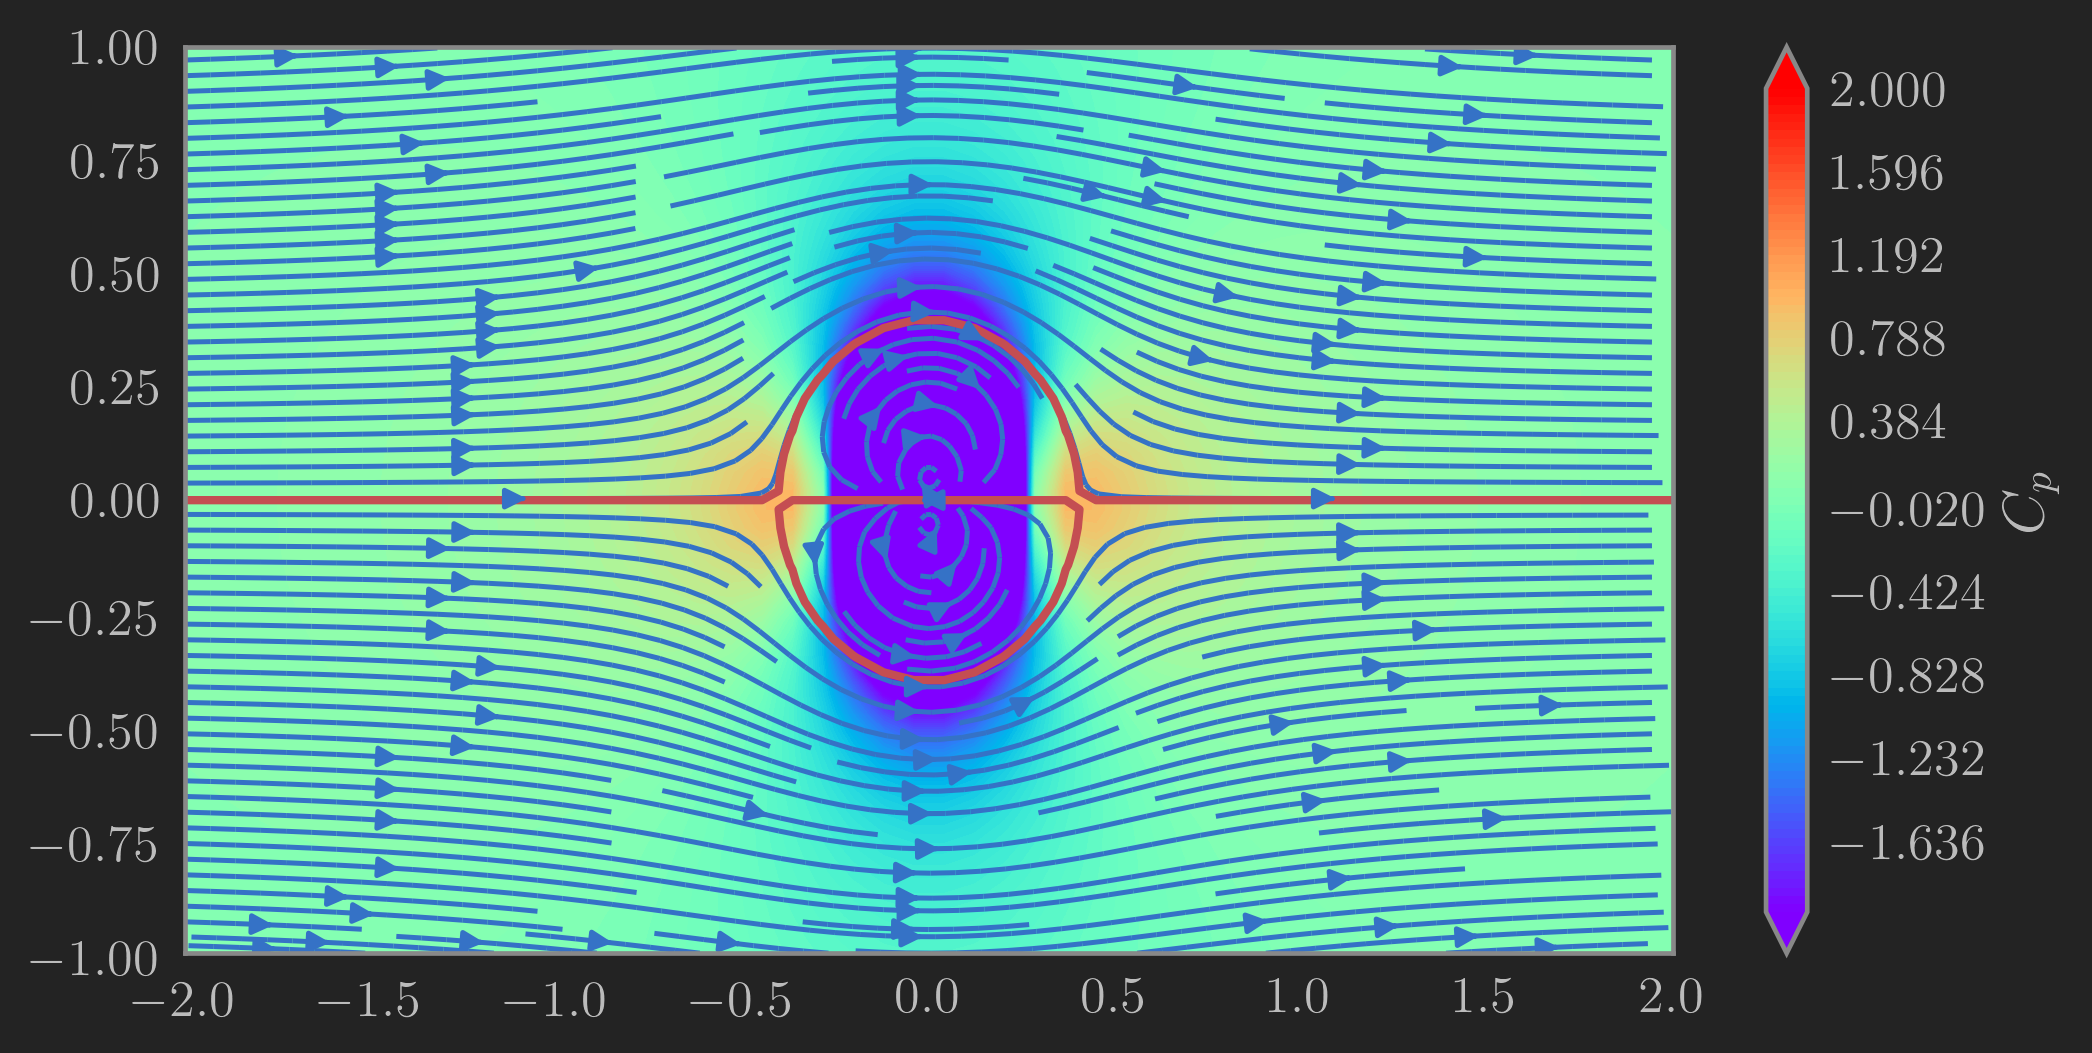

In [284]:
grid_size = 50
x_domain, y_domain = (-2, 2), (-1, 1)
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0
uniform_mag = 1.0
uniform_ang = 0.0

uniform = Uniform(uniform_mag, uniform_ang)
doublet = Doublet(kappa, x_doublet, y_doublet)
vels = [ uniform.velocity(X, Y)[i] + doublet.velocity(X, Y)[i] for i in range(2) ]
stream = uniform.stream_func(X, Y) + doublet.stream_func(X, Y)
cp = pressure_coefficient(vels[0], vels[1], uniform_mag)

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig6 = plt.figure(3, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, vels[0], vels[1], density=2)
plt.contourf(X, Y, cp, levels=numpy.linspace(x_domain[0], x_domain[1], 100), extend='both', cmap=cm.rainbow)
plt.colorbar(label=r'$C_p$')
CS1 = plt.contour(X, Y, stream,
               levels=[0.], 
               colors='r', linewidths=2, linestyles='solid')
plt.xlim(x_domain)
plt.ylim(y_domain);

This example is where the actual use of summation of solutions to Laplace's equation is apparent in determining velocities. When combined with a uniform flow, this can approximate the potential flow over a cylinder. The result is a flow in which the pressure coefficient distribution is symmetric about both axes if the location of the doublet is at the origin. This implies that there is no drag across the cylinder, which is the first failure of potential flow theory, and is called **D'Alembert's paradox**. This is a failure because experiments indicate that a cylinder does generate a drag force, and the reason for this is the viscous terms from the Navier-Stokes equations, which have been ignored in this mathematical framework.

Radius of the cylinder:
    

SOLVE: You have the streamfunction of the doublet in cylindrical coordinates above. Add the streamfunction of the free stream in those coordinates, and study it. You will see that $\psi=0$ at $r=a$ for all values of $\theta$. The line $\psi=0$ represents the circular cylinder of radius $a$. Now write the velocity components in cylindrical coordinates, find the speed of the flow at the surface. What does this tell you?

Show that the pressure coefficient distribution on the surface of the circular cylinder is given by

$$C_p = 1-4\sin^2\theta$$

and plot the coefficient of pressure versus the angle

## Source Flow on an Airfoil

A collection of sources can be used to approximate the flow around an airfoil. The case under consideration is a NACA 0012 symmetrical airfoil in an external flow of $1\ m/s$ at $0^{\circ}$ angle of attack. The stagnation points occur at the leading and trailing edges of the airfoil where the velocity is zero due to the symmetry.

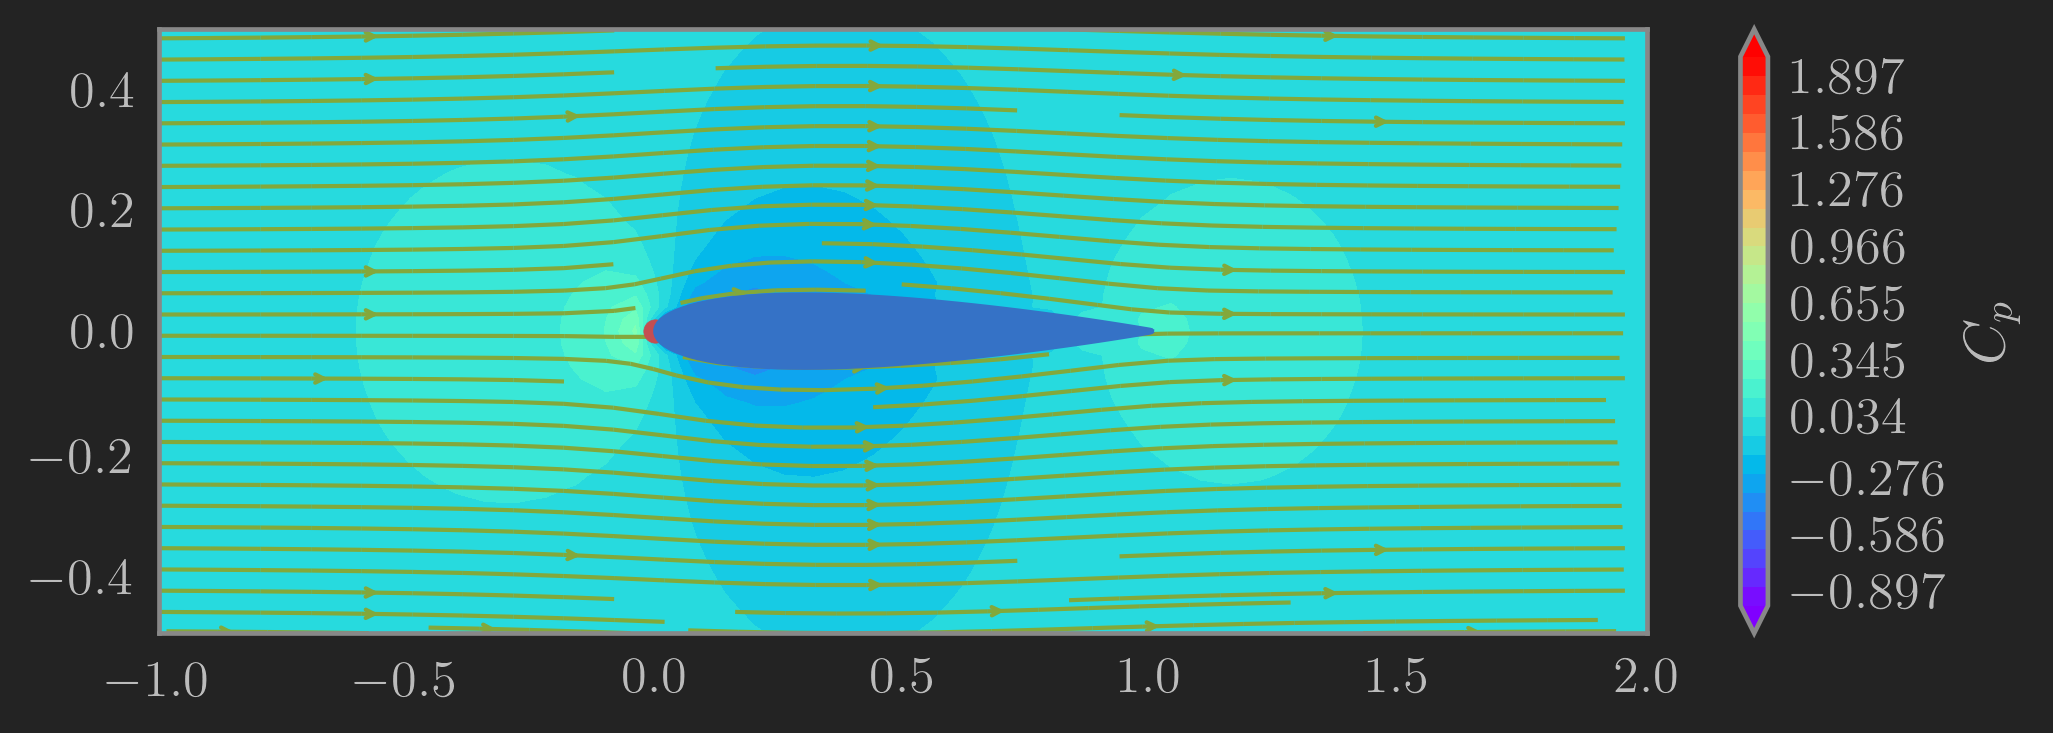

In [287]:
# Import data
x_coords = np.loadtxt('NACA0012_x.txt')
y_coords = np.loadtxt('NACA0012_y.txt')
sources = np.loadtxt('NACA0012_sigma.txt')
y_pos = list(filter(lambda x: x >= 0, y_coords))
y_neg = list(filter(lambda x: x <= 0, y_coords))

# Define grid
grid_size = 51
x_domain, y_domain = (-1, 2), (-0.5, 0.5)
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

# Potentials
uniform_mag = 1.0
uniform_ang = 0.0
uniform = Uniform(uniform_mag, uniform_ang)
srcs = [ Source(sigma, x, y) for x, y, sigma in zip(x_coords, y_coords, sources) ]
vels = [ uniform.velocity(X, Y)[i] + sum([ point.velocity(X, Y)[i] for point in srcs ]) for i in range(2) ]
pot = uniform.potential(X, Y) + sum([ point.potential(X, Y) for point in srcs ])
stream = uniform.stream_func(X, Y) + sum([ point.stream_func(X, Y) for point in srcs ])
cp = pressure_coefficient(vels[0], vels[1], uniform_mag)

# Stagnation point
x_stag = 0.0
y_stag = 0.0

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig6 = plt.figure(3, figsize=(width, height), dpi=300)
plt.plot(x_coords, y_coords)
plt.contourf(X, Y, cp, levels=numpy.linspace(x_domain[0], x_domain[1], 30), extend='both', cmap=cm.rainbow)
plt.colorbar(label=r'$C_p$')
plt.streamplot(X, Y, vels[0], vels[1], density=1, linewidth=1, arrowsize=0.5, arrowstyle='->', zorder=1)
plt.fill(x_coords, y_coords)
plt.scatter(x_stag, y_stag, color='r', marker='o')
plt.xlim(x_domain)
plt.ylim(y_domain);

## Vortex Flow

A **vortex** can be defined as a flow in which the tangential streamline, constructed as a concentric circle with the vortex point as the centre, is inversely proportional to the radius, and the radial velocity is $0$. Note that this construction is essentially 'dual' to a source. Consider the circulation of such a flow along the streamline, with the convention that an anti-clockwise rotation is positive (because the left-hand-path $>$ right-hand-path):

$$ \Gamma = \oint_C \vec V \cdot d\vec l = 2\pi ru_{\theta} $$

Hence the velocity components are:

$$ u_r = 0, \quad u_{\theta} = \frac{\Gamma}{2\pi r} $$

Velocity potential:

$$ \frac{\partial \phi}{\partial r} = 0, \quad \frac{1}{r}\frac{\partial \phi}{\partial \theta} =  \frac{\Gamma}{2\pi r} $$ 

$$ \implies \phi(r,\theta) = \frac{\Gamma}{2\pi}\theta$$

Stream function:

$$ \frac{1}{r}\frac{\partial \psi}{\partial \theta} = 0, \quad -\frac{\partial\psi}{\partial r} = \frac{\Gamma}{2\pi r} $$ 

$$ \implies \psi(r,\theta) = -\frac{\Gamma}{2\pi}\ln r $$

So source and vortex flows are isomorphic under the transformation of the complex potential $\phi \leftrightarrow \psi$, with different physics arising because of the definitions.

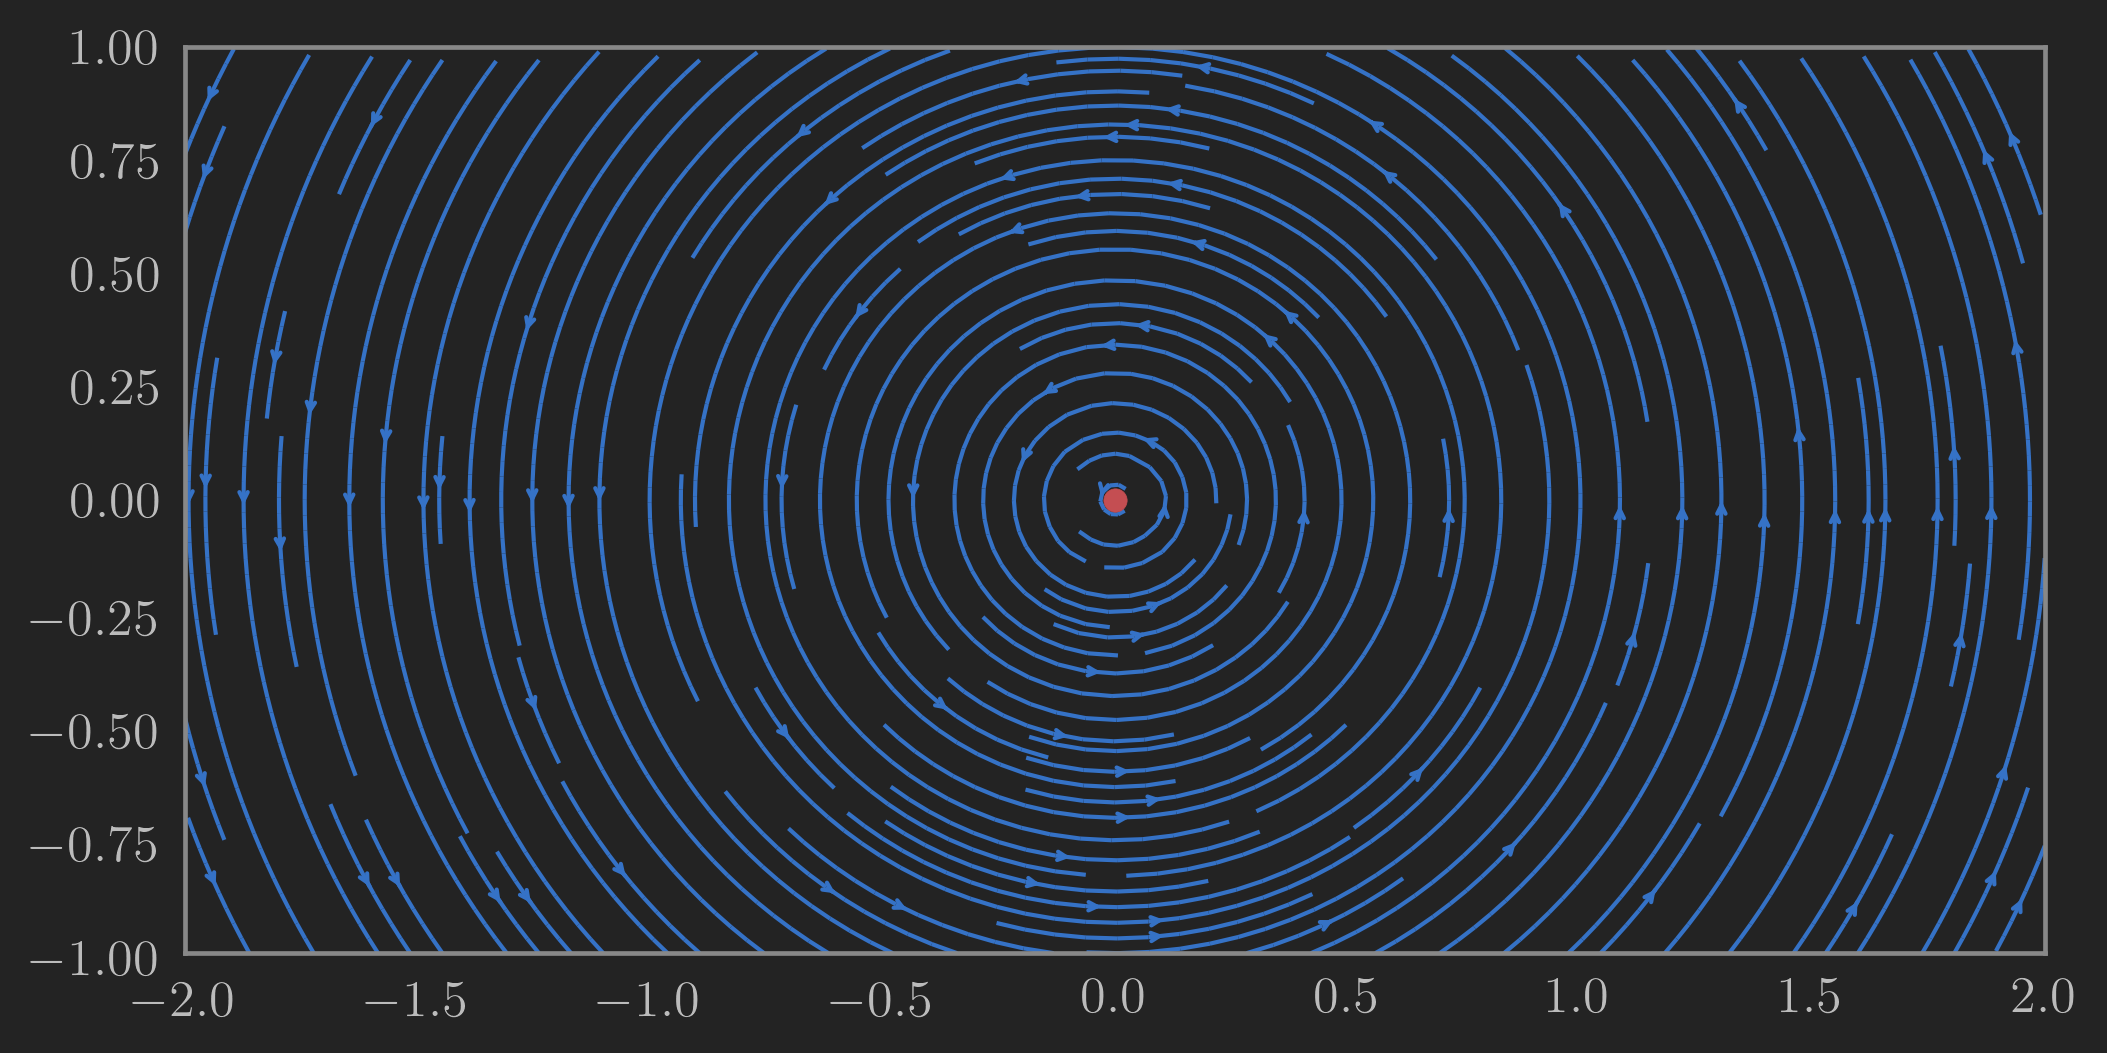

In [300]:
class Vortex:
    """
    Defines a vortex.
    
    Parameters
    ---
    Gamma: strength
    x_0: vortex x-location
    y_0: vortex y-location
    """
    import numpy as np
    
    def __init__(self, gamma, x_0, y_0):
        self.strength = gamma
        self.x_0 = x_0
        self.y_0 = y_0
        
    def velocity(self, x, y):
        u = -self.strength/(2*np.pi)*(y - self.y_0)/((x - self.x_0)**2 + (y - self.y_0)**2)
        v = self.strength/(2*np.pi)*(X - self.x_0)/((x - self.x_0)**2 + (y - self.y_0)**2)
        
        return (u, v)
    
    def stream_func(self, x, y):
        psi = self.strength/(4*np.pi)*np.log(np.sqrt((x - self.x_0)**2 + (y - self.y_0)**2))
        
        return psi
        
    def potential(self, x, y):
        pot = self.strength/(2*np.pi)*np.arctan2(y - self.y_0, x - self.x_0)
        
        return pot

grid_size = 50
x_domain, y_domain = (-2, 2), (-1, 1)
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

gamma = 1.0
x_loc, y_loc = 0.0, 0.0

vortex = Vortex(gamma, x_loc, y_loc)
vels = vortex.velocity(X, Y)
stream = vortex.stream_func(X, Y)
pot = vortex.potential(X, Y)

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig1 = plt.figure(1, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, vels[0], vels[1], density=2, linewidth=1, arrowsize=0.5, arrowstyle='->', zorder=1)
plt.scatter(x_loc, y_loc, color='r', marker='o')
plt.xlim(x_domain)
plt.ylim(y_domain);

#### Vortex with a Sink Flow

Let's try to approximate the flow of a toilet flush by superposing a vortex and a sink.

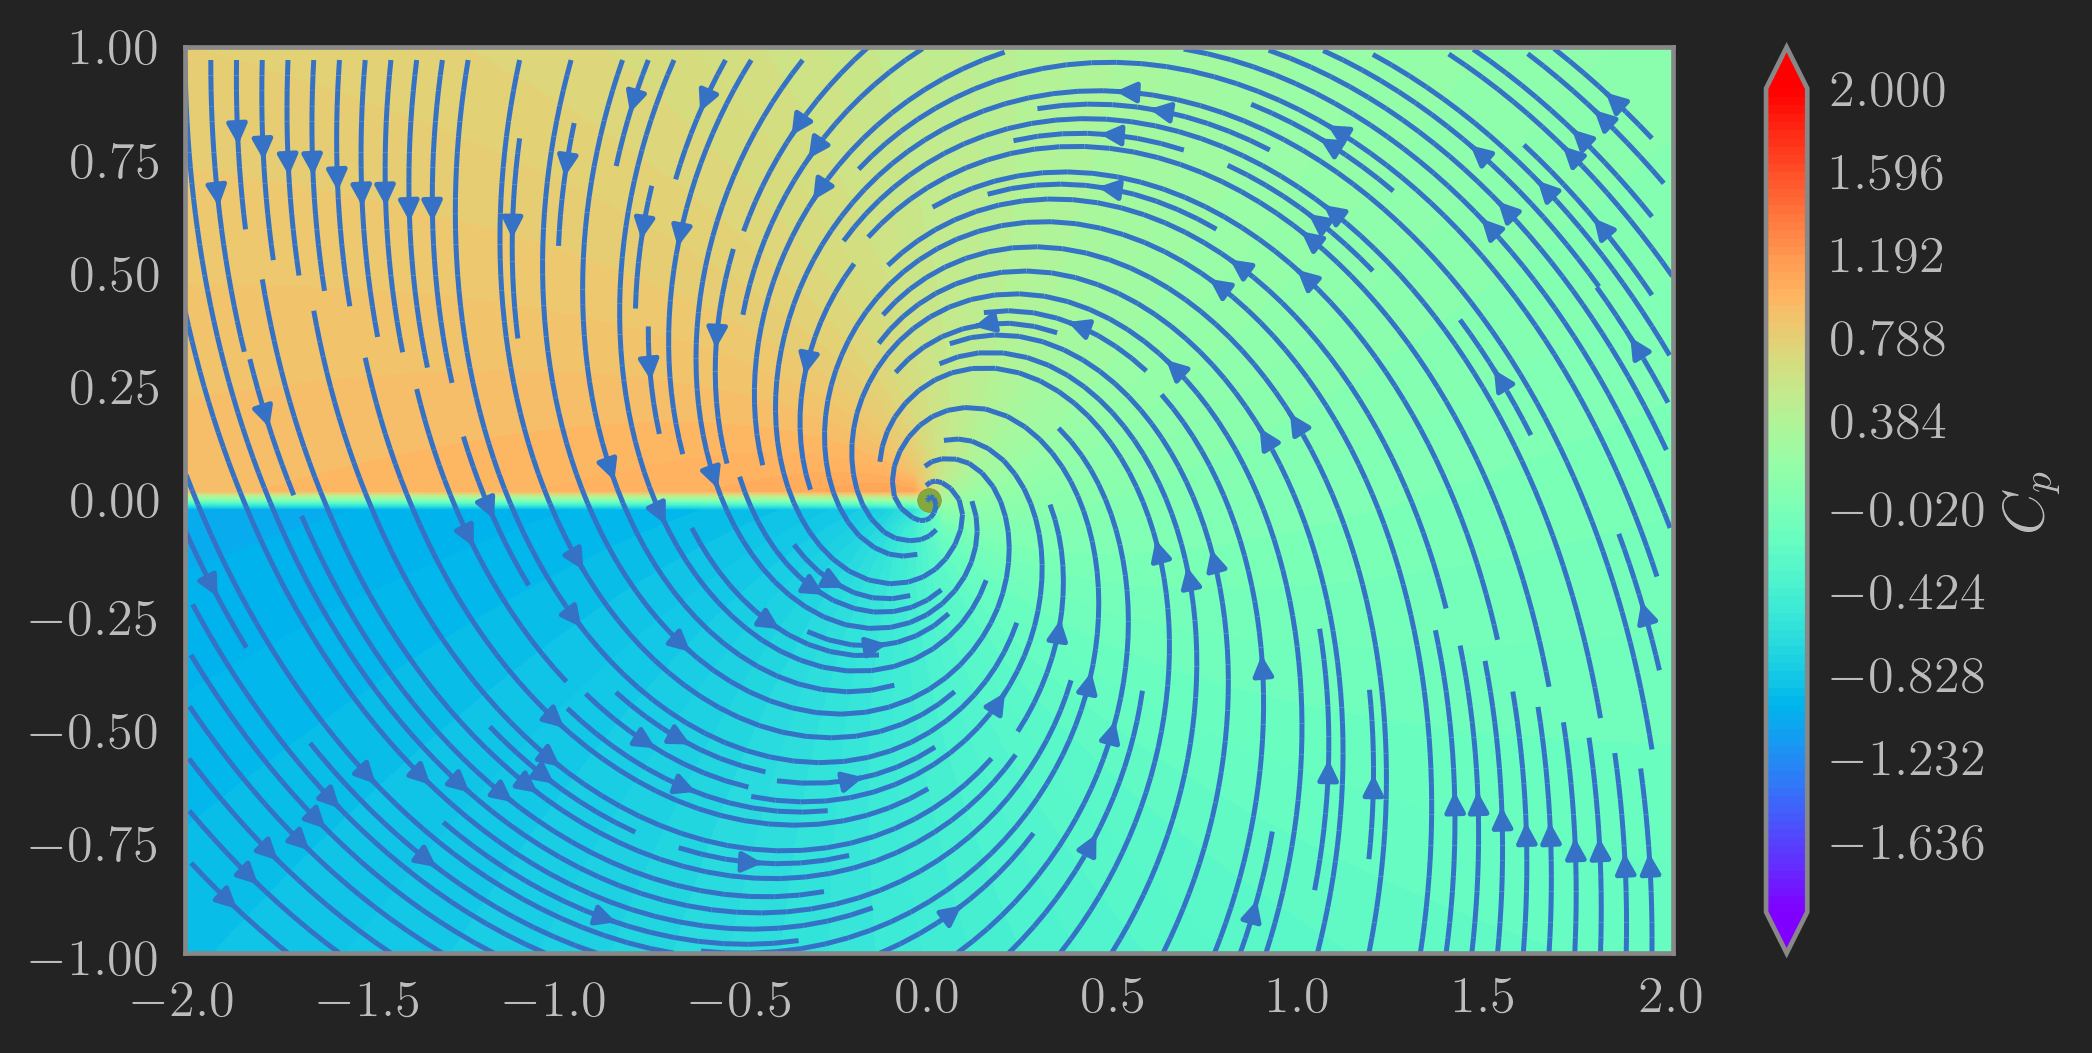

In [303]:
grid_size = 50
x_domain, y_domain = (-2, 2), (-1, 1)
x_dom, y_dom = np.linspace(x_domain[0], x_domain[1], grid_size), np.linspace(y_domain[0], y_domain[1], grid_size)
X, Y = np.meshgrid(x_dom, y_dom)

gamma = 2.0
sigma = -1.0
x_vor, y_vor = 0.0, 0.0
x_sink, y_sink = 0.0, 0.0

vortex = Vortex(gamma, x_vor, y_vor)
sink = Source(sigma, x_sink, y_sink)
vels = [ vortex.velocity(X, Y)[i] + sink.velocity(X, Y)[i] for i in range(2) ]
stream = vortex.stream_func(X, Y) + sink.stream_func(X, Y)
pot = vortex.potential(X, Y) + sink.potential(X, Y)

width = 8.0
height = (y_domain[1] - y_domain[0]) / (x_domain[1] - x_domain[0]) * width
fig6 = plt.figure(3, figsize=(width, height), dpi=300)
plt.streamplot(X, Y, vels[0], vels[1], density=2)
plt.contourf(X, Y, pot, levels=numpy.linspace(x_domain[0], x_domain[1], 100), extend='both', cmap=cm.rainbow)
plt.colorbar(label=r'$C_p$')
# CS1 = plt.contour(X, Y, stream,
#                levels=[0.], 
#                colors='r', linewidths=2, linestyles='solid')
plt.scatter(x_vor, y_vor, color='r', marker='o')
plt.scatter(x_sink, y_sink, color='g', marker='o')
plt.xlim(x_domain)
plt.ylim(y_domain);

Explain intuition.

#### Row of vortices

Construct a uniform one-dimensional lattice of unidirectional vortices on a straight line and see what happens if you extend it to infinity.